## Dependencies

In [1]:
# prompt: kết nối với drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%pip install nltk
%pip install sentence-transformers
%pip install spotipy requests pillow
%pip install torch torchvision numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Summary:

## 1. Data Exploration/Preparation

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train Music/songs_with_attributes_and_lyrics.csv')

In [ ]:
df.head(5)

,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838000,0.4710,0.193,100.059,79500.0,"He said he came from Jamaica,\n he owned a cou..."
1,2ASl4wirkeYm3OWZxXKYuq,!!,NaN,Yxngxr1,0.788,0.6480,7,-9.135,0,0.3150,0.90000,0.000000,0.1760,0.287,79.998,114000.0,"Fucked a bitch, now she running with my kids\n..."
2,69lcggVPmOr9cvPx9kLiiN,!!! - Interlude,Where I Belong EP,['Glowie'],0.000,0.0354,7,-20.151,0,0.0000,0.90800,0.000000,0.4790,0.000,0.000,11413.0,"Oh, my God, I'm going crazy\n"
3,4U7dlZjg1s9pjdppqZy0fm,!!De Repente!!,Un Palo Al Agua (20 Grandes Canciones),['Rosendo'],0.657,0.8820,5,-6.340,1,0.0385,0.00740,0.000013,0.0474,0.939,123.588,198173.0,Continuamente se extraña la gente si no puede ...
4,4v1IBp3Y3rpkWmWzIlkYju,!!De Repente!!,Fuera De Lugar,['Rosendo'],0.659,0.8930,5,-8.531,1,0.0411,0.09220,0.000019,0.0534,0.951,123.600,199827.0,Continuamente se extraña la gente si no puede ...


In [ ]:
df.shape

(955320, 17)

In [ ]:
df.isnull().sum()

,0
id,0
name,11
album_name,569763
artists,2
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0


In [ ]:
df_selected = df[["id", "name", "album_name", "artists", "lyrics"]]

In [ ]:
df_selected.head(5)

,id,name,album_name,artists,lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],"He said he came from Jamaica,\n he owned a cou..."
1,2ASl4wirkeYm3OWZxXKYuq,!!,NaN,Yxngxr1,"Fucked a bitch, now she running with my kids\n..."
2,69lcggVPmOr9cvPx9kLiiN,!!! - Interlude,Where I Belong EP,['Glowie'],"Oh, my God, I'm going crazy\n"
3,4U7dlZjg1s9pjdppqZy0fm,!!De Repente!!,Un Palo Al Agua (20 Grandes Canciones),['Rosendo'],Continuamente se extraña la gente si no puede ...
4,4v1IBp3Y3rpkWmWzIlkYju,!!De Repente!!,Fuera De Lugar,['Rosendo'],Continuamente se extraña la gente si no puede ...


In [ ]:
df_selected = df_selected.dropna()

In [ ]:
df_selected.isnull().sum()

,0
id,0
name,0
album_name,0
artists,0
lyrics,0


In [ ]:
df_selected.shape

(385552, 5)

In [ ]:
df_selected.to_csv("/content/drive/MyDrive/Colab Notebooks/Train Music/filtered_songs.csv", index=False, encoding="utf-8")

In [ ]:
import pandas as pd
df_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train Music/filtered_songs.csv')

In [ ]:
df_new = df_new.sample(5000).reset_index(drop=True)

In [107]:
df_new.isnull().sum()

,0
id,0
name,0
album_name,0
artists,0
lyrics,0
lyrics_embedding,0
album_url,0
image_embedding,0
combined_embedding,0


In [ ]:
df_new.shape

(5000, 5)

In [ ]:
df_new.head(10)

,id,name,album_name,artists,lyrics
0,4ffoJKKNKrdK8lKIrGrkC8,When We All Get To Heaven,When We All Get To Heaven - Single,['Adrian D. Holmes'],Sing the wondrous love of Jesus.\n Sing his me...
1,3F3t4hWwbOYeknl8zmbHUj,Darkside,The Edge,['Mackenzie Nicole'],I'm not taking nothing for the pain\n Cause my...
2,7bFtveQt1DAfmL510WxyD8,Nothing Else I Can Do,Free,['Virtue'],Feel like I spent forever waitin' for this lov...
3,1AoQ5MJL4qVdpOvTgn3Ynj,What I Meant To Say - Single Version,The Essential Bangles,['The Bangles'],"I pick the day, I pick the place\n I pick the ..."
4,6yy7SQN7iOcrq8xKlJxmYj,Storehouse,Red Balloon,['Sandra McCracken'],The first uninterrupted sleep since July\n The...
5,3pgefUMXOTIL58xZHXixG1,Aldonza,Man of La Mancha (New Broadway Cast Recording ...,"['Mary Elizabeth Mastrantonio', 'Brian Stokes ...",My lady...\n I am not your lady!...\n I am not...
6,1YQwHJUu5P1phaUnCOJvjD,All I See,Nucleus,['Dawnbringer'],Everybody in this room!\n Everybody better lis...
7,0j3dGGZBTRa3hZubKT9n7M,Red Eye (feat. WSTRN & Lil Baby),Plug Talk,The Plug,Pull up with all my niggas in a van\n I just g...
8,7hh4SVZj27fYkcL6YEH0vD,Delinelle,True View,['Stick To Your Guns'],I left scars on your heart like the cracks in ...
9,1Mg1LHCGE2pEmJXhpSOzkx,Oh Carolina,The Essential Vince Gill,['Vince Gill'],Sunrise through the evergreen\n Another day is...


In [ ]:
df_new['lyrics'][6]

"I'm not the guy who cared about love,\n And I'm not the guy who cared about fortunes and such,\n never cared much,\n Oh, look at you now!\n I never knew the technique of kissin',\n I never knew the thrill I could get from your touch,\n Never knew much,\n Oh, look at you now!\n You'r a new man,\n Better than\n Casanova at his best;\n With a new heart,\n A brand new start,\n I'm so proud I'm bustin' my vest!\n So you'r the guy who turned down a lover.\n Yes I'm the guy who laughed at those blue diamond rings,\n One o' those things,\n But look at you now!\n He's not the guy who cared about love,\n And he's not the guy who cared about fortunes and such,\n cared about much,\n But look at him now!\n I'm a lover!\n He never knew the technique of kissin',\n He never knew the thrill he could get from her touch,\n Never knew much,\n But look at him now!\n Man I really come on.\n He's a new man,\n Better than\n Casanova at his best, brother!\n With a new start,\n A brand new heart,\n he's so pro

## Text Cleaning

In [ ]:
df_new['lyrics'] = df_new['lyrics'].str.lower().replace(r'^\w\s',' ').replace(r'\n',' ',regex=True)

In [ ]:
df_new.head(5)

,id,name,album_name,artists,lyrics
0,4AJSezeHRUJsQGlnhSQDUM,Cruz de tecido - Ao vivo,O Rappa - Acústico Oficina Francisco Brennand ...,O Rappa,olhos em pânico refletem as chamas que cruzam ...
1,2VD0kaPt1mIM5EVw3Tittq,Promessas - Ao Vivo,É Diferente (Ao Vivo),Sorriso Maroto,eu já te conheço é fácil de notar fica trans...
2,5wiSbeDm2p5yniuus7eH4J,Black & White,MoonChild Era,Diljit Dosanjh,intense ਤੇਰੇ ਪਿੱਛੇ ਚੱਕਤੀ ਲਗੌੜ ਸੀ ਬੜੀ ਹੁਣ ਚੱਕ...
3,223T6tgHvEJ718xwSuk3Fr,Der Jodelautomat (Japaner),Schürzenjägerzeit,['Schürzenjäger'],"habt's schon g'hört, habt's schon g'sehn wie ..."
4,6w9gSYWhmSaXKbQeTJFa3t,Lazy Love,Evermotion,['Guster'],"wake on up, let's not get lazy, love we're al..."


## Streamer

In [ ]:
import nltk

from nltk.stem.porter import PorterStemmer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
steammer = PorterStemmer()

In [ ]:
def token(txt):
  token = nltk.word_tokenize(txt)
  a = [steammer.stem(w) for w in token]
  return " ".join(a)

In [ ]:
token("hello, running, jumped, cats")

'hello , run , jump , cat'

In [ ]:
df_new['lyrics'] = df_new['lyrics'].apply(lambda x: token(x))

In [ ]:
df_new['lyrics'].head(5)

,lyrics
0,sing the wondrou love of jesu . sing hi merci ...
1,i 'm not take noth for the pain caus my music ...
2,feel like i spent forev waitin ' for thi love ...
3,"i pick the day , i pick the place i pick the f..."
4,the first uninterrupt sleep sinc juli the firs...


## Using BERT Embedding for Lyrics

In [3]:
from sentence_transformers import SentenceTransformer

# Load mô hình BERT đã pre-train
model_bert = SentenceTransformer('all-MiniLM-L6-v2')  # Mô hình nhẹ, nhanh, hiệu quả


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df_new['lyrics_embedding'] = df_new['lyrics'].apply(lambda x: model_bert.encode(x))

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

lyrics_embeddings = np.stack(df_new['lyrics_embedding'].values)


In [ ]:
import pickle

# Lưu embedding
with open("/content/drive/MyDrive/Colab Notebooks/Train Music/lyrics_embeddings.pkl", "wb") as f:
    pickle.dump(lyrics_embeddings, f)

In [ ]:
print(type(lyrics_embeddings))
print(len(lyrics_embeddings))
print(lyrics_embeddings[:3])

<class 'numpy.ndarray'>
5000
[[-0.04042276  0.07934904  0.06186327 ...  0.00290437 -0.01251919
  -0.04029667]
 [ 0.02463183 -0.08494992  0.01882993 ...  0.00771544 -0.03489808
  -0.06636794]
 [-0.11551173 -0.04339178  0.01200652 ...  0.14247535  0.03208233
  -0.0946696 ]]


In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Train Music/lyrics_embeddings.pkl", "rb") as f:
    data = pickle.load(f)

# print(type(data))
# print(len(data))
# print(data[:3])

#Image Album form Spotify

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import pandas as pd

In [ ]:
# Load mô hình ResNet-50 đã pretrain
model_cnn = models.resnet50(pretrained=True)
model_cnn = torch.nn.Sequential(*(list(model_cnn.children())[:-1]))  # Bỏ lớp cuối (Fully Connected)
model_cnn.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 60.5MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


## Cấu hình API Key

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Điền thông tin Client ID & Secret từ Spotify Developer
SPOTIFY_CLIENT_ID = "e2a98278229a450bad238b9460debf27"
SPOTIFY_CLIENT_SECRET = "d54cc92e17ad43e2aa9d86218a963dc0"

# Xác thực API
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID,
                                                                client_secret=SPOTIFY_CLIENT_SECRET))


In [ ]:
# Tạo từ điển lưu trữ tạm thời các URL ảnh đã truy xuất
album_image_cache = {}

In [ ]:
# Hàm lấy ảnh album từ Spotify API với bộ nhớ đệm
def get_album_image(song_id):
    if song_id in album_image_cache:
        # Nếu đã có trong bộ nhớ đệm, trả về ngay
        return album_image_cache[song_id]
    try:
        track_info = spotify.track(song_id)  # Lấy thông tin bài hát từ Spotify
        album_image_url = track_info["album"]["images"][0]["url"]  # Ảnh độ phân giải cao nhất
        # Lưu vào bộ nhớ đệm
        album_image_cache[song_id] = album_image_url
        return album_image_url
    except Exception as e:
        print(f"🚫 Không tìm thấy ảnh cho {song_id}: {e}")
        return None

In [ ]:
# Thêm cột 'album_url' vào DataFrame
df_new["album_url"] = df_new["id"].apply(lambda x: get_album_image(x))

# Kiểm tra lại DataFrame
print(df_new.head())

🚫 Không tìm thấy ảnh cho 7AV1hh76pC1mg4iSH796Vp: list index out of range
🚫 Không tìm thấy ảnh cho 0688MlKfqvhvxVsuUMtOWO: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


🚫 Không tìm thấy ảnh cho 0StKIZfMhQ2TKqFCIMcSaD: list index out of range


🚫 Không tìm thấy ảnh cho 6LRq0MNodUm7ooKsCFV8G4: list index out of range


                       id                                  name  \
0  4ffoJKKNKrdK8lKIrGrkC8             When We All Get To Heaven   
1  3F3t4hWwbOYeknl8zmbHUj                              Darkside   
2  7bFtveQt1DAfmL510WxyD8                 Nothing Else I Can Do   
3  1AoQ5MJL4qVdpOvTgn3Ynj  What I Meant To Say - Single Version   
4  6yy7SQN7iOcrq8xKlJxmYj                            Storehouse   

                           album_name               artists  \
0  When We All Get To Heaven - Single  ['Adrian D. Holmes']   
1                            The Edge  ['Mackenzie Nicole']   
2                                Free            ['Virtue']   
3               The Essential Bangles       ['The Bangles']   
4                         Red Balloon  ['Sandra McCracken']   

                                              lyrics  \
0  sing the wondrou love of jesu . sing hi merci ...   
1  i 'm not take noth for the pain caus my music ...   
2  feel like i spent forev waitin ' for thi love .

In [ ]:
df_new = df_new.dropna(subset=["album_url"]).reset_index(drop=True)

In [117]:
df_new.shape

(4996, 9)

In [ ]:
df_new.sample(10)

,id,name,album_name,artists,lyrics,lyrics_embedding,album_url
3311,73sZ0CEGpi5wMTEg0XnsaG,World Cup Drumming,My Pain and Sadness Is More Sad and Painful Th...,['Mclusky'],"it 's war i tell ya , i met some fella who use...","[-0.023692038, -0.059818044, 0.013534059, -0.0...",https://i.scdn.co/image/ab67616d0000b273fe71c7...
403,5WsfL4OTQZyDyo8EbExkjO,Don't Cry,Lullaby Renditions of Guns N' Roses,['Rockabye Baby!'],talk to me softli there 's someth in your eye ...,"[-0.09474963, -0.09646922, 0.01541938, -0.0421...",https://i.scdn.co/image/ab67616d0000b273e6956a...
605,0NEh24OJ2rGc74SeUB8eto,ON AIR,TRIANGLE,['3YE'],비우고 또 비워내도 또 차 올라서 바라고 또 바라보죠 날 바라봐 주길 스치는 바람도...,"[0.0045870156, 0.028244903, 0.051918734, 0.067...",https://i.scdn.co/image/ab67616d0000b273fd1b33...
1009,1WAeLjHXMOefR5j51hMGAA,Des Moines,Salt as Wolves,['Jeffrey Foucault'],that night in de moin the goner 'd street and ...,"[-0.058753345, 0.045020267, 0.0030552675, -0.0...",https://i.scdn.co/image/ab67616d0000b27348671b...
3949,6DZAGriJAR2yosH28cS9I9,Medley,Lingua Mortis,['Rage'],medley ( black in mind / sent by the devil ) i...,"[-0.023220109, -0.015358512, -0.060180303, 0.0...",https://i.scdn.co/image/ab67616d0000b273fcb7a4...
3865,6zEz8nIQs7rNj7cjZPXakd,Always There,Reflection of Something,['Todd Agnew'],i 've been lean on thing i 'm find unstabl i '...,"[-0.088587694, -0.100068346, -0.024846548, 0.0...",https://i.scdn.co/image/ab67616d0000b273325206...
3210,6BxU209oWmLBhpXaLPSsOi,Hard Times In Babylon,Hard Times In Babylon,['Eliza Gilkyson'],i light a candl in your name long past midnigh...,"[-0.065655686, 0.0147472685, 0.062259167, 0.01...",https://i.scdn.co/image/ab67616d0000b273bba696...
4397,3ihLQmgQ6YfxgqtzieTRsD,Lindo Céu (Ao Vivo),"Paz Sim, Violência Não (Volume 2) [Ao Vivo]",['Padre Marcelo Rossi'],"por sobr as nuven , exist um lindo céu , marav...","[-0.045601383, -0.03880366, -0.019369062, -0.0...",https://i.scdn.co/image/ab67616d0000b273aa5aff...
2960,5vwvIBu4kMTCr2GHg2Yacp,Toxic,The Chapin Sisters E.P.,['The Chapin Sisters'],"babi , ca n't you see i 'm call ? a guy like y...","[-0.049819212, -0.06547697, 0.0048663123, 0.02...",https://i.scdn.co/image/ab67616d0000b273c41075...
4412,26M2xHAdevLUWZGLVW7x7B,Life Under Siege,The Snow Bunker Tapes,['Death In June'],eleven year further on the futur 's been and g...,"[-0.038763218, -0.01636299, 0.009179839, -0.02...",https://i.scdn.co/image/ab67616d0000b27366be08...


In [ ]:
df_new.to_json("/content/drive/MyDrive/Colab Notebooks/Train Music/df_new_with_album_url.json", orient="records", lines=True)

In [ ]:
df_new = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Train Music/df_new_with_album_url.json", orient="records", lines=True)

In [119]:
df_new.to_pickle("/content/drive/MyDrive/Colab Notebooks/Train Music/df_new_with_album_url.pkl")


## Hàm tải ảnh từ URL

In [ ]:
def download_image(image_url):
    try:
        response = requests.get(image_url, timeout=5)
        if response.status_code == 200:
            return Image.open(BytesIO(response.content))
    except Exception as e:
        print(f"🚫 Lỗi tải ảnh: {e}")
    return None

## Hàm xử lý ảnh trước khi đưa vào mô hình

In [ ]:
def process_image(image):
    # Chuyển ảnh grayscale thành RGB nếu cần
    if image.mode != "RGB":
        image = image.convert("RGB")

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = transform(image).unsqueeze(0)  # Thêm batch dimension
    return image


## Hàm trích xuất embedding từ ảnh album

In [ ]:
def get_image_embedding(image):
    image = process_image(image)
    with torch.no_grad():
        features = model_cnn(image)
    return features.squeeze().numpy().flatten()  # Trả về vector 1D (2048 chiều)

## Tạo cột lưu embedding từ ảnh

In [ ]:
image_embeddings = []

for index, row in df_new.iterrows():
    image_url = row["album_url"]
    album_image = download_image(image_url)  # Tải ảnh từ URL
    if album_image:
        image_embedding = get_image_embedding(album_image)  # Chuyển ảnh thành vector
    else:
        image_embedding = np.zeros(2048)  # Nếu không có ảnh, dùng vector 0
    image_embeddings.append(image_embedding)


In [ ]:
# Lưu vào DataFrame
df_new["image_embedding"] = image_embeddings

In [ ]:
print(image_embedding[:10])  # In ra 10 giá trị đầu của vector

[0.31799707 1.3906068  0.11817636 0.9105237  0.5183459  0.3021038
 0.49564677 0.82623106 0.08865277 0.6537031 ]


In [ ]:
def combine_features(lyrics_embedding, image_embedding):
    return np.concatenate([lyrics_embedding, image_embedding])  # Ghép 2 vector lại

In [ ]:
df_new["combined_embedding"] = df_new.apply(lambda row: combine_features(row["lyrics_embedding"], row["image_embedding"]), axis=1)

In [ ]:
print(df_new["combined_embedding"].iloc[0].shape)

(2432,)


In [ ]:
img_embeddings = np.stack(df_new['image_embedding'].values)

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Train Music/image_embeddings.pkl", "wb") as f:
    pickle.dump(img_embeddings, f)

In [ ]:
comb_embeddings = np.stack(df_new['combined_embedding'].values)

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Train Music/combined_embeddings.pkl", "wb") as f:
    pickle.dump(comb_embeddings, f)

In [ ]:
df_new.head(5)

,id,name,album_name,artists,lyrics,lyrics_embedding,album_url,image_embedding,combined_embedding
0,4ffoJKKNKrdK8lKIrGrkC8,When We All Get To Heaven,When We All Get To Heaven - Single,['Adrian D. Holmes'],sing the wondrou love of jesu . sing hi merci ...,"[-0.0404227562, 0.07934904100000001, 0.0618632...",https://i.scdn.co/image/ab67616d0000b273c088a5...,"[0.018996425, 2.4533987, 0.03884521, 0.7531403...","[-0.0404227562, 0.07934904100000001, 0.0618632..."
1,3F3t4hWwbOYeknl8zmbHUj,Darkside,The Edge,['Mackenzie Nicole'],i 'm not take noth for the pain caus my music ...,"[0.0246318281, -0.08494991810000001, 0.0188299...",https://i.scdn.co/image/ab67616d0000b273692af1...,"[0.01191248, 1.5936568, 0.6993642, 0.0, 0.1066...","[0.0246318281, -0.08494991810000001, 0.0188299..."
2,7bFtveQt1DAfmL510WxyD8,Nothing Else I Can Do,Free,['Virtue'],feel like i spent forev waitin ' for thi love ...,"[-0.1155117303, -0.0433917791, 0.0120065156, 0...",https://i.scdn.co/image/ab67616d0000b273250b6f...,"[0.032784592, 1.1793395, 1.3109949, 0.11950465...","[-0.1155117303, -0.0433917791, 0.0120065156, 0..."
3,1AoQ5MJL4qVdpOvTgn3Ynj,What I Meant To Say - Single Version,The Essential Bangles,['The Bangles'],"i pick the day , i pick the place i pick the f...","[-0.0825651214, -0.0504539348, 0.0686348379000...",https://i.scdn.co/image/ab67616d0000b273fed4a8...,"[0.058486987, 3.4177675, 1.1779283, 0.34909475...","[-0.0825651214, -0.0504539348, 0.0686348379000..."
4,6yy7SQN7iOcrq8xKlJxmYj,Storehouse,Red Balloon,['Sandra McCracken'],the first uninterrupt sleep sinc juli the firs...,"[-0.0512279235, 0.029072696300000003, 0.004722...",https://i.scdn.co/image/ab67616d0000b273cd4efe...,"[0.012813982, 3.6590788, 0.14305198, 0.2577685...","[-0.0512279235, 0.029072696300000003, 0.004722..."


## Fixing

In [15]:
import pickle
import numpy as np

# Load embeddings từ file
with open("/content/drive/MyDrive/Colab Notebooks/Train Music/image_embeddings.pkl", "rb") as f:
    image_embeddings = pickle.load(f)

with open("/content/drive/MyDrive/Colab Notebooks/Train Music/lyrics_embeddings.pkl", "rb") as f:
    lyrics_embeddings = pickle.load(f)

# Chuyển thành numpy array (nếu chưa)
image_embeddings = np.array(image_embeddings)
lyrics_embeddings = np.array(lyrics_embeddings)

# Kiểm tra kích thước
print("Image Embeddings Shape:", image_embeddings.shape)
print("Lyrics Embeddings Shape:", lyrics_embeddings.shape)


Image Embeddings Shape: (4996, 2048)
Lyrics Embeddings Shape: (5000, 384)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

image_embeddings_scaled = scaler.fit_transform(image_embeddings)
lyrics_embeddings_scaled = scaler.fit_transform(lyrics_embeddings)


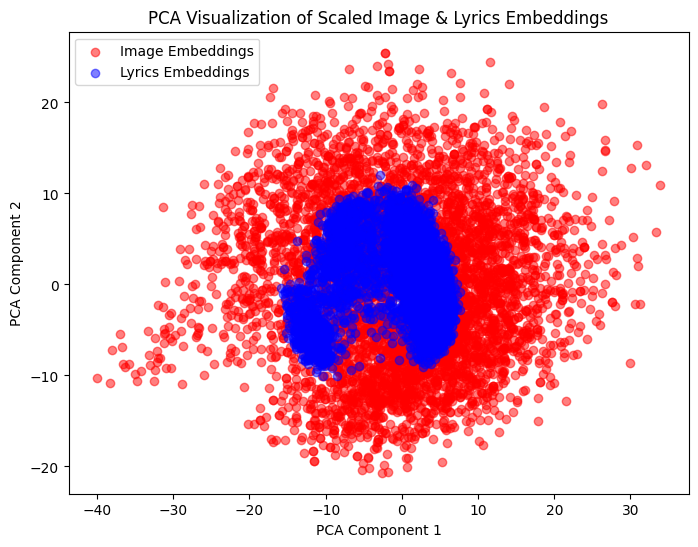

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

image_pca = pca.fit_transform(image_embeddings_scaled)
lyrics_pca = pca.fit_transform(lyrics_embeddings_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(image_pca[:, 0], image_pca[:, 1], alpha=0.5, label="Image Embeddings", color='red')
plt.scatter(lyrics_pca[:, 0], lyrics_pca[:, 1], alpha=0.5, label="Lyrics Embeddings", color='blue')
plt.legend()
plt.title("PCA Visualization of Scaled Image & Lyrics Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


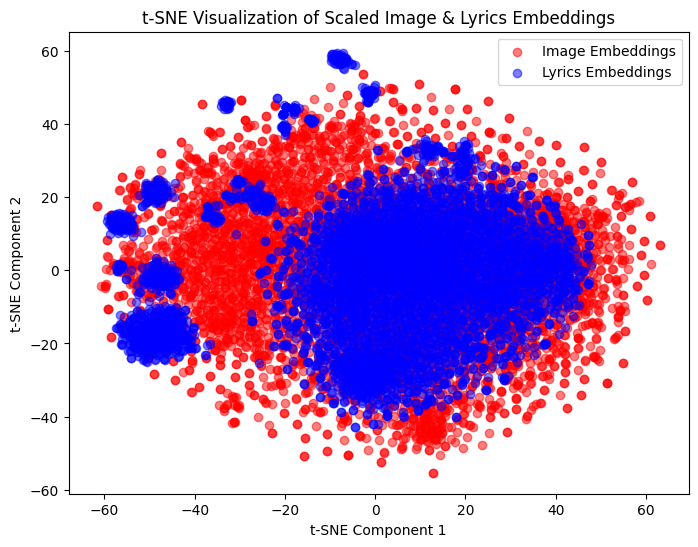

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

image_tsne = tsne.fit_transform(image_embeddings_scaled)
lyrics_tsne = tsne.fit_transform(lyrics_embeddings_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(image_tsne[:, 0], image_tsne[:, 1], alpha=0.5, label="Image Embeddings", color='red')
plt.scatter(lyrics_tsne[:, 0], lyrics_tsne[:, 1], alpha=0.5, label="Lyrics Embeddings", color='blue')
plt.legend()
plt.title("t-SNE Visualization of Scaled Image & Lyrics Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [19]:
# Cắt bớt để có cùng số lượng sample (chọn min giữa 2 tập)
min_samples = min(image_embeddings_scaled.shape[0], lyrics_embeddings_scaled.shape[0])

image_embeddings_final = image_embeddings_scaled[:min_samples]
lyrics_embeddings_final = lyrics_embeddings_scaled[:min_samples]

In [20]:
# Ghép nối 2 embeddings theo chiều feature (axis=1)
combined_embeddings = np.concatenate((image_embeddings_final, lyrics_embeddings_final), axis=1)


In [21]:
with open("/content/drive/MyDrive/Colab Notebooks/Train Music/combined_embeddings_final.pkl", "wb") as f:
    pickle.dump(combined_embeddings, f)

#Recommender Function

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Tính ma trận cosine similarity giữa tất cả bài hát
with open("/content/drive/MyDrive/Colab Notebooks/Train Music/combined_embeddings.pkl", "rb") as f:
    combined_embeddings = pickle.load(f)

print(f"✅ Loaded combined_embeddings with shape: {combined_embeddings.shape}")

✅ Loaded combined_embeddings with shape: (4996, 2432)


In [24]:
# Tính ma trận cosine similarity
similarity_matrix = cosine_similarity(combined_embeddings)

print(f"✅ Computed similarity matrix with shape: {similarity_matrix.shape}")


✅ Computed similarity matrix with shape: (4996, 4996)


## Save Model

In [25]:
with open("/content/drive/MyDrive/Colab Notebooks/Train Music/similarity_matrix.pkl", "wb") as f:
    pickle.dump(similarity_matrix, f)

## Get Song in Spotify

In [ ]:
def get_new_releases():
    results = spotify.new_releases(limit=50)  # Lấy 10 bài hát mới nhất
    songs = []

    for item in results["albums"]["items"]:
        song_name = item["name"]
        artist_name = item["artists"][0]["name"]
        song_id = item["id"]
        songs.append((song_name, artist_name, song_id))

    return songs

# Test thử
new_songs = get_new_releases()
for song in new_songs:
    print(song)


('THE TORTURED POETS DEPARTMENT', 'Taylor Swift', '1Mo4aZ8pdj6L1jx8zSwJnt')
('Dark Matter', 'Pearl Jam', '7MNrrItJpom6uMJWdT0XD8')
('HERicane', 'Lucky Daye', '4YQ8O3PQb7cZnnLeqNPaa1')
('Teka (with Peso Pluma)', 'DJ Snake', '4MGpOqMU3FlZ7li35laoBu')
('REBEL', 'Anne Wilson', '0sJhrYC1988r2NNxsmzk3V')
('Define My Name', 'Nas', '5nabWI5Yf9uYtDS79CXVHu')
('Wasteland, Baby! (Special Edition)', 'Hozier', '7hf5xjz74wwX1wS76DU2Ik')
('Baddy On The Floor', 'Jamie xx', '2fDJNwprKYSK4ovmRzcoe4')
('For Life (feat. Nile Rodgers)', 'Kygo', '2Cqf3izEp75CqTKgul5Mi1')
('Espectacular', 'Sky Rompiendo', '2HLdCDKtyV4VxHLYk5xvAS')
('Half Life', 'Wyatt Flores', '51JYG8XPpVVVA7uQTnm4tI')
('Starburster', 'Fontaines D.C.', '1KkyOpscmbPAQzLNZDyI6o')
('WAHALA (FEAT. OLAMIDE)', 'CKay', '59BxJKNg7wRYlJxAahb3YW')
('Suffer In Silence', 'Tee Grizzley', '1qJghQpnRM2sRbhX3lWXHz')
('Damascus', 'Elvie Shane', '0VZCWi3C9oARyCsoZKCMhg')
('Vampire in Beverly Hills', 'Eyedress', '34GevB4U1WHwDcm7kQmANH')
('Memory Morning', 'To

In [ ]:
def search_spotify(song_name, artist_name):
    """Tìm bài hát trên Spotify theo tên bài hát và ca sĩ."""
    query = f"track:{song_name} artist:{artist_name}"
    results = spotify.search(q=query, type="track", limit=1)

    if results["tracks"]["items"]:
        track = results["tracks"]["items"][0]
        return {
            "name": track["name"],
            "artist": track["artists"][0]["name"],
            "spotify_url": track["external_urls"]["spotify"],
            "album_url": track["album"]["images"][0]["url"] if track["album"]["images"] else None
        }
    return None  # Không tìm thấy bài hát

def recommend_song(song_name):
    """Tìm kiếm bài hát tương tự dựa trên `similarity_matrix` và kiểm tra trên Spotify."""
    if song_name not in df_new["name"].values:
        return "🚨 Không tìm thấy bài hát trong hệ thống!"

    # Tìm index của bài hát
    idx = df_new[df_new["name"] == song_name].index[0]

    # Lấy danh sách bài hát tương tự
    distances = list(enumerate(similarity_matrix[idx]))
    distances = sorted(distances, key=lambda x: x[1], reverse=True)

    # Lấy thông tin bài hát gốc
    original_song = df_new.iloc[idx]["name"]
    original_artist = df_new.iloc[idx]["artists"]

    # In bài hát gốc
    print(f"\n🎵 **Bài hát gốc:** {original_song} - {original_artist}")

    # Tìm kiếm 5 bài hát tương tự và kiểm tra trên Spotify
    recommended_songs = []
    for d in distances[1:10]:  # Kiểm tra nhiều bài hơn để tránh trường hợp không có trên Spotify
        song = df_new.iloc[d[0]]["name"]
        artist = df_new.iloc[d[0]]["artists"]

        # Kiểm tra bài hát có trên Spotify không
        spotify_info = search_spotify(song, artist)
        if spotify_info:
            recommended_songs.append(spotify_info)

        if len(recommended_songs) == 5:  # Lấy đúng 5 bài hát
            break

    # Hiển thị kết quả
    if recommended_songs:
        print("\n🎶 **Gợi ý bài hát trên Spotify:**")
        for i, track in enumerate(recommended_songs, 1):
            print(f"{i}. [{track['name']} - {track['artist']}]({track['spotify_url']})")
        return recommended_songs
    else:
        return "🚨 Không tìm thấy bài hát nào trên Spotify!"

# Ví dụ: Gợi ý bài hát "Hello"
recommend_song("Hello")


🎵 **Bài hát gốc:** Hello - ['Kuh Ledesma']

🎶 **Gợi ý bài hát trên Spotify:**
1. [You're the Cream in My Coffee - Annette Hanshaw](https://open.spotify.com/track/3ErYLaztJ6sTYBbpO7rU82)
2. [Mariana (feat. MARCO) - Lucas Lucco](https://open.spotify.com/track/7dIIhvHLfaun4lCR0koSPo)
3. [Nappy Heads - Remix - Fugees](https://open.spotify.com/track/0hKr166QnNZ0a37G4UO0VY)
4. [Donna Luna - 2005 Remaster - Alan Sorrenti](https://open.spotify.com/track/7w3931k2s6LH7ppMXfQnWn)
5. [What I Meant To Say - Single Version - The Bangles](https://open.spotify.com/track/1AoQ5MJL4qVdpOvTgn3Ynj)


[{'name': "You're the Cream in My Coffee",
  'artist': 'Annette Hanshaw',
  'spotify_url': 'https://open.spotify.com/track/3ErYLaztJ6sTYBbpO7rU82',
  'album_url': 'https://i.scdn.co/image/ab67616d0000b2731035d17cc3d8934496ba7cb1'},
 {'name': 'Mariana (feat. MARCO)',
  'artist': 'Lucas Lucco',
  'spotify_url': 'https://open.spotify.com/track/7dIIhvHLfaun4lCR0koSPo',
  'album_url': 'https://i.scdn.co/image/ab67616d0000b27352c51f9a6d2327d68952f1b8'},
 {'name': 'Nappy Heads - Remix',
  'artist': 'Fugees',
  'spotify_url': 'https://open.spotify.com/track/0hKr166QnNZ0a37G4UO0VY',
  'album_url': 'https://i.scdn.co/image/ab67616d0000b273157b3fe32437a57ca97dd31a'},
 {'name': 'Donna Luna - 2005 Remaster',
  'artist': 'Alan Sorrenti',
  'spotify_url': 'https://open.spotify.com/track/7w3931k2s6LH7ppMXfQnWn',
  'album_url': 'https://i.scdn.co/image/ab67616d0000b2733d659811ad168e1a1c46f8be'},
 {'name': 'What I Meant To Say - Single Version',
  'artist': 'The Bangles',
  'spotify_url': 'https://open.

In [ ]:
recommend_song("Nothing Else I Can Do")


🎵 **Bài hát gốc:** Nothing Else I Can Do - ['Virtue']

🎶 **Gợi ý bài hát tương tự:**
1. Minha Vida Sem Você - Ao Vivo - Limão Com Mel
2. No, No, No, Pt. 1 - ["Destiny's Child"]
3. En Cero - Yandel;Sebastian Yatra;Manuel Turizo
4. Oh Baby I - ['Eternal']
5. It's Real (feat. Ginuwine) - ['Mýa', 'Ginuwine']


[('Minha Vida Sem Você - Ao Vivo', 'Limão Com Mel'),
 ('No, No, No, Pt. 1', '["Destiny\'s Child"]'),
 ('En Cero', 'Yandel;Sebastian Yatra;Manuel Turizo'),
 ('Oh Baby I', "['Eternal']"),
 ("It's Real (feat. Ginuwine)", "['Mýa', 'Ginuwine']")]

In [ ]:
def mean_average_precision(ground_truth, k=5):
    total_precision = 0
    num_songs = len(ground_truth)

    for song, actual_songs in ground_truth.items():
        recommended_songs = [s[0] for s in recommend_song(song)]
        total_precision += precision_at_k(recommended_songs, actual_songs, k)

    return total_precision / num_songs

# Tính MAP
map_score = mean_average_precision(ground_truth, k=5)
print(f"📊 Mean Average Precision (MAP) = {map_score:.2f}")



🎵 **Bài hát gốc:** Hello - ['Kuh Ledesma']

🎶 **Gợi ý bài hát tương tự:**
1. You're the Cream In My Coffee - ['Annette Hanshaw']
2. Mariana (feat. MARCO) - ['Lucas Lucco', 'MARCO']
3. In Chicago - ['Amy Speace']
4. Nappy Heads - Remix - ['Fugees', 'Salaam Remi']
5. Donna luna - ['Alan Sorrenti']
⚠️ Bài hát 'Shape of You' không có trong dữ liệu.
📊 Mean Average Precision (MAP) = 0.00
